In [19]:
from skyfield.api import Star, load
import pandas
from skyfield.data import hipparcos

with load.open(hipparcos.URL) as f:
    df = hipparcos.load_dataframe(f)

barnards_star = Star.from_dataframe(df.loc[87937])

In [20]:
planets = load('de421.bsp')
earth = planets['earth']

ts = load.timescale()
t = ts.now()
astrometric = earth.at(t).observe(barnards_star)
ra, dec, distance = astrometric.radec()
print(ra)
print(dec)

17h 57m 47.24s
+04deg 45' 46.6"


In [21]:
df = df[df['ra_degrees'].notnull()]

In [22]:
df = df[df['magnitude'] <= 4]
print('After filtering, there are {} stars'.format(len(df)))

After filtering, there are 518 stars


In [23]:
bright_stars = Star.from_dataframe(df)

t = ts.utc(2018, 9, 3)
astrometric = earth.at(t).observe(bright_stars)
ra, dec, distance = astrometric.radec()

print('There are {} right ascensions'.format(len(ra.hours)))
print('and {} declinations'.format(len(dec.degrees)))

There are 518 right ascensions
and 518 declinations


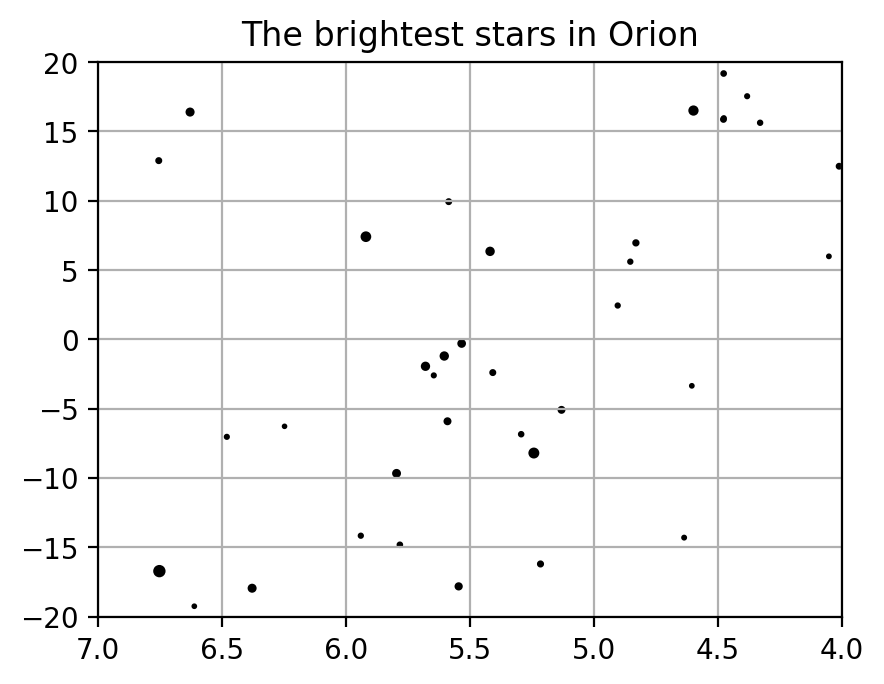

In [24]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.scatter(ra.hours, dec.degrees, 9 - df['magnitude']*2, 'k')
ax.set_xlim(7.0,4.0)
ax.set_ylim(-20, 20)
ax.grid(True)
ax.set(title='The brightest stars in Orion')
fig.savefig('bright_stars.png')